In [1]:
# Import Libs
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Reshape, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, UpSampling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Load Dataset
mnist_csv = pd.read_csv("./mnist_train.csv", header=None, skiprows=1).values
print(mnist_csv.shape)

(59999, 785)


In [5]:
# Split
train, test = train_test_split(mnist_csv, test_size=0.3, random_state=1)
print(train.shape)
print(test.shape)

(41999, 785)
(18000, 785)


In [7]:
# X, Y def.
Y_train, X_train = np_utils.to_categorical(train[:,0]), train[:, 1:]
Y_test, X_test = np_utils.to_categorical(test[:,0]), test[:, 1:]
print(Y_train.shape, X_train.shape)
print(Y_train.shape, X_test.shape)

(41999, 10) (41999, 784)
(41999, 10) (18000, 784)


In [8]:
# Normalization
X_train = (X_train)/255.
X_test = (X_test)/255.

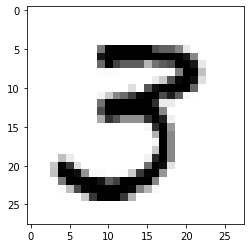

In [9]:
plt.imshow(np.reshape(X_train[0], (28,28)), cmap=plt.cm.gray_r)

In [11]:
# Define Model
cnn_input = Input((784,)) # input으로 첫번째 차원이 784인 2D텐서만 입력으로 받는 층을 생성
H = Reshape((28, 28, 1))(cnn_input)
# CPCP
H = Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = MaxPool2D((2, 2))(H)
H = Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = MaxPool2D((2, 2))(H)
H = BatchNormalization()(H)
H = Dropout(0.5)(H)
# dropout: 여러 개의 모델을 만드는 대신에 모델 결합에 의한 투표효과와 비슷한 효과를 내기 위해 학습 사이클이 진행되는 동안 무작위로 일부 뉴런을 생략한다.

# MLP
H = Flatten()(H)
# 일차원으로 바꿔주는 flatten layer
# cnn에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출되고, 추출된 주요 특징은 전결합층에 전달되어 학습됨.
# 컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 함. 
H = Dense(512, activation='tanh')(H)
H = BatchNormalization()(H)
H = Dense(64, activation='tanh')(H)
H = BatchNormalization()(H)
cnn_output = Dense(10, activation='softmax')(H)
# Compile CNN
cnn_model = Model(cnn_input, cnn_output)
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# Model Summary
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
__________

In [13]:
# Train CNN
history = cnn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                       epochs=10, batch_size=512, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 41999 samples, validate on 18000 samples
Epoch 1/10
 - 41s - loss: 0.3477 - acc: 0.8928 - val_loss: 0.1758 - val_acc: 0.9467
Epoch 2/10
 - 39s - loss: 0.1325 - acc: 0.9606 - val_loss: 0.1064 - val_acc: 0.9683
Epoch 3/10
 - 40s - loss: 0.0938 - acc: 0.9714 - val_loss: 0.0791 - val_acc: 0.9759
Epoch 4/10
 - 43s - loss: 0.0752 - acc: 0.9769 - val_loss: 0.0579 - val_acc: 0.9823
Epoch 5/10
 - 42s - loss: 0.0681 - acc: 0.9789 - val_loss: 0.0605 - val_acc: 0.9822
Epoch 6/10
 - 41s - loss: 0.0549 - acc: 0.9831 - val_loss: 0.0516 - val_acc: 0.9840
Epoch 7/10
 - 41s - loss: 0.0535 - acc: 0.9830 - val_loss: 0.0465 - val_acc: 0.9862
Epoch 8/10
 - 41s - loss: 0.0410 - acc: 0.9870 - val_loss: 0.0482 - val_acc: 0.9862
Epoch 9/10
 - 42s - loss: 0.0405 - acc: 0.9872 - val_loss: 0.0443 - val_acc: 0.9866
Epoch 10/10
 - 41s - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0517 - val_acc: 0.9848


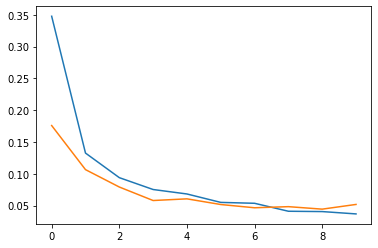

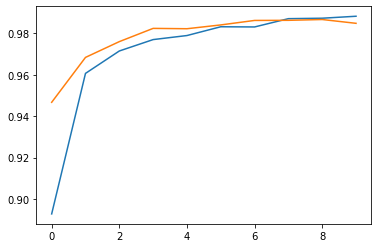

In [15]:
# Plot Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [16]:
Y_test_hat = cnn_model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_test_hat, axis=1)))

[[1728    0    2    1    0    0    3    0    5    0]
 [   1 1976    5    4    2    0    1    1    5    5]
 [   0    0 1801   12    0    0    0    4   12    0]
 [   0    0    2 1843    0    1    0    1    2    1]
 [   0    1    2    0 1706    0    3    2    3   24]
 [   3    0    1   15    1 1586    9    0   17   10]
 [   4    1    1    1    1    0 1709    0    7    0]
 [   2    4   11    9    5    0    0 1855    3   20]
 [   1    1    0    5    3    0    4    1 1783    6]
 [   0    0    0    7    4    1    0    4    7 1739]]


In [17]:
# X_train_2d, X_test_2d
X_train_2d, X_test_2d = np.zeros((X_train.shape[0], 28, 28, 1)), np.zeros((X_test.shape[0], 28, 28, 1))
for r in range(X_train.shape[0]):
    X_train_2d[r] = np.reshape(X_train[r], (28, 28, 1))
for r in range(X_test.shape[0]):
    X_test_2d[r] = np.reshape(X_test[r], (28, 28, 1))
print(X_train_2d.shape, X_test_2d.shape)

(41999, 28, 28, 1) (18000, 28, 28, 1)


In [33]:
# Convolutional Autoencoder
# Enoder
CAE_input = Input((28, 28, 1))
H = Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='tanh')(CAE_input)
# Con2D레이어: 영상 인식에 주로 사용되며 필터가 탑재되어 있음
# filters: 컨볼루션 필터의 수
# kernel_size: 컨볼루션 커널의 (행, 열)
# padding: 경게 처리 방법을 정의 - valid: 유효한 영역만 출력됨. 출력 이미지 사이즈는 입력 사이즈보다 작음, same: 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
# input_shape: 샘플 수를 제외한 입력 형태를 정의함. 모델에서 첫 레이어일때만 정의하면 됨. (행, 열, 채널수)로 정의함, 흑백 영상인 경우 채널이 1이고 컬러인경우 채널이 3으로 설정됨
# activation: 활성화 함수 설정 - linear: 디폴트값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴. relu: 은닉충에 주로 사용됨 등등
H = MaxPool2D((2, 2))(H)
# 컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만듦. 지역적인 사소한 변화가 영향을 미치지 않도록 함
# 수직, 수평 축소 비율, (2,2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어듦
H = Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = MaxPool2D((2, 2))(H)
# Decoder
H = Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = UpSampling2D((2, 2))(H)
H = Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='tanh')(H)
H = UpSampling2D((2, 2))(H)
CAE_output = Conv2D(filters=1, kernel_size=(2, 2), padding='same', activation='sigmoid')(H)
# Compile Model
CAE_model = Model(CAE_input, CAE_output)
CAE_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
CAE_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 16)        1040      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 16)          1040      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 16)        0         
__________

In [19]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [20]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [21]:
from keras.utils import np_utils
x_train = x_train[0:5000,:,:,:]
y_train_notOne = y_train[0:5000,:]
x_test = x_test[0:1000,:,:,:]
y_test_notOne = y_test[0:1000,:]

In [22]:
y_train = np_utils.to_categorical(y_train_notOne)
y_test = np_utils.to_categorical(y_test_notOne)

In [23]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)


In [24]:
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

In [26]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [28]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, verbose=2, validation_data=[x_test, y_test])

Train on 5000 samples, validate on 1000 samples
Epoch 1/100
 - 5s - loss: 14.3072 - acc: 0.0958 - val_loss: 10.9707 - val_acc: 0.0880
Epoch 2/100
 - 4s - loss: 3.0120 - acc: 0.1412 - val_loss: 2.2456 - val_acc: 0.1640
Epoch 3/100
 - 4s - loss: 2.2051 - acc: 0.1974 - val_loss: 2.1255 - val_acc: 0.2130
Epoch 4/100
 - 4s - loss: 2.1017 - acc: 0.2328 - val_loss: 2.0271 - val_acc: 0.2260
Epoch 5/100
 - 4s - loss: 2.0419 - acc: 0.2678 - val_loss: 1.9130 - val_acc: 0.3190
Epoch 6/100
 - 4s - loss: 1.8965 - acc: 0.3232 - val_loss: 2.2566 - val_acc: 0.2060
Epoch 7/100
 - 4s - loss: 1.8566 - acc: 0.3322 - val_loss: 1.8133 - val_acc: 0.3280
Epoch 8/100
 - 5s - loss: 1.7496 - acc: 0.3704 - val_loss: 1.7352 - val_acc: 0.3720
Epoch 9/100
 - 4s - loss: 1.6834 - acc: 0.4024 - val_loss: 2.0442 - val_acc: 0.2770
Epoch 10/100
 - 5s - loss: 1.6715 - acc: 0.3982 - val_loss: 1.6755 - val_acc: 0.3730
Epoch 11/100
 - 5s - loss: 1.5589 - acc: 0.4596 - val_loss: 1.7022 - val_acc: 0.4120
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.1245 - acc: 0.9672 - val_loss: 3.9917 - val_acc: 0.4680
Epoch 98/100
 - 5s - loss: 0.1136 - acc: 0.9668 - val_loss: 4.0968 - val_acc: 0.4860
Epoch 99/100
 - 5s - loss: 0.0762 - acc: 0.9780 - val_loss: 4.1273 - val_acc: 0.4540
Epoch 100/100
 - 5s - loss: 0.0713 - acc: 0.9780 - val_loss: 4.2333 - val_acc: 0.4510


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

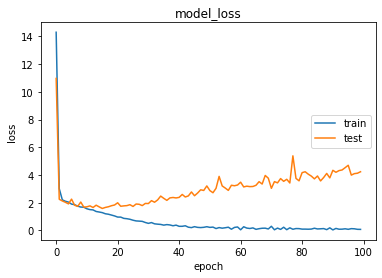

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()